In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print('number of images', x_train.shape[0])

print("number of labels:", len(y_train))

print('size of the test arrays:', x_test.shape[0])

x_train = x_train / 255.0
x_test = x_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step
number of images 60000
number of labels: 60000
size of the test arrays: 10000


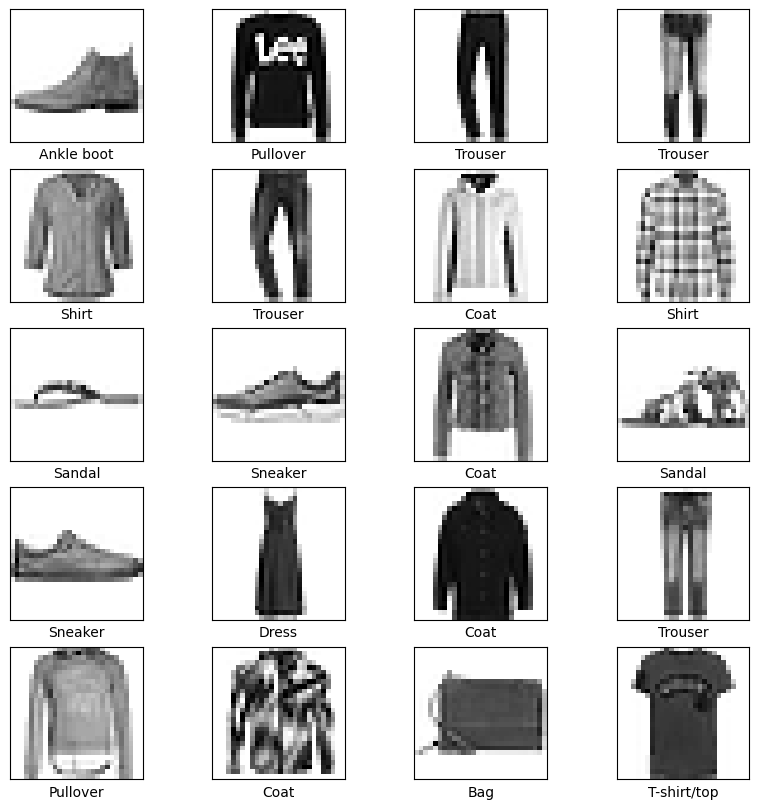

In [3]:
plt.figure(figsize=(10,10))

for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [7]:
# Defining the model
def fashion_mnist_model_v1_improved(epochs=50, batch_size=64):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(10, activation='softmax'),
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    return history

history_v1_improved = fashion_mnist_model_v1_improved()

Epoch 1/50
750/750 [==============================] - 7s 8ms/step - loss: 0.5417 - accuracy: 0.8070 - val_loss: 0.4551 - val_accuracy: 0.8298
Epoch 2/50
750/750 [==============================] - 7s 9ms/step - loss: 0.4324 - accuracy: 0.8443 - val_loss: 0.3790 - val_accuracy: 0.8614
Epoch 3/50
750/750 [==============================] - 6s 7ms/step - loss: 0.3993 - accuracy: 0.8539 - val_loss: 0.4048 - val_accuracy: 0.8537
Epoch 4/50
750/750 [==============================] - 7s 9ms/step - loss: 0.3819 - accuracy: 0.8607 - val_loss: 0.3789 - val_accuracy: 0.8602
Epoch 5/50
750/750 [==============================] - 6s 7ms/step - loss: 0.3632 - accuracy: 0.8654 - val_loss: 0.3919 - val_accuracy: 0.8602
Epoch 6/50
750/750 [==============================] - 7s 9ms/step - loss: 0.3530 - accuracy: 0.8700 - val_loss: 0.3615 - val_accuracy: 0.8701
Epoch 7/50
750/750 [==============================] - 6s 8ms/step - loss: 0.3425 - accuracy: 0.8733 - val_loss: 0.3691 - val_accuracy: 0.8665
Epoch 

In [8]:
# Improved version definition of the model with more layers and neurons
def fashion_mnist_model_v2_improved(epochs=50, batch_size=64):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(10, activation='softmax'),
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test Accuracy: {test_accuracy*100:.2f}%')

    return history

history_v2_improved = fashion_mnist_model_v2_improved()

Epoch 1/50
750/750 [==============================] - 13s 15ms/step - loss: 0.5508 - accuracy: 0.8035 - val_loss: 0.4699 - val_accuracy: 0.8188
Epoch 2/50
750/750 [==============================] - 11s 14ms/step - loss: 0.4308 - accuracy: 0.8435 - val_loss: 0.4195 - val_accuracy: 0.8434
Epoch 3/50
750/750 [==============================] - 11s 15ms/step - loss: 0.3946 - accuracy: 0.8542 - val_loss: 0.3758 - val_accuracy: 0.8577
Epoch 4/50
750/750 [==============================] - 13s 18ms/step - loss: 0.3832 - accuracy: 0.8609 - val_loss: 0.3879 - val_accuracy: 0.8607
Epoch 5/50
750/750 [==============================] - 11s 15ms/step - loss: 0.3642 - accuracy: 0.8658 - val_loss: 0.3622 - val_accuracy: 0.8679
Epoch 6/50
750/750 [==============================] - 11s 14ms/step - loss: 0.3527 - accuracy: 0.8711 - val_loss: 0.3644 - val_accuracy: 0.8633
Epoch 7/50
750/750 [==============================] - 11s 15ms/step - loss: 0.3415 - accuracy: 0.8738 - val_loss: 0.3794 - val_accuracy:

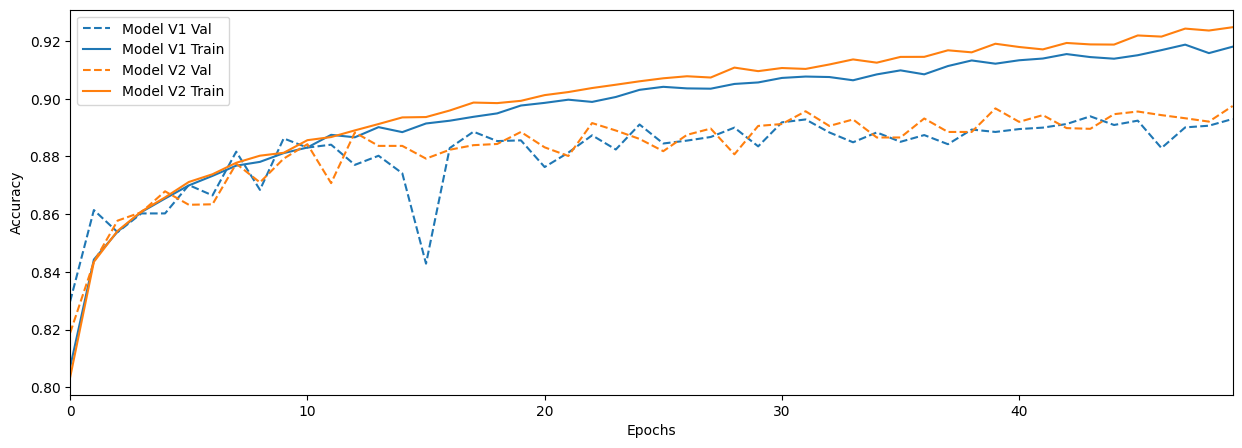

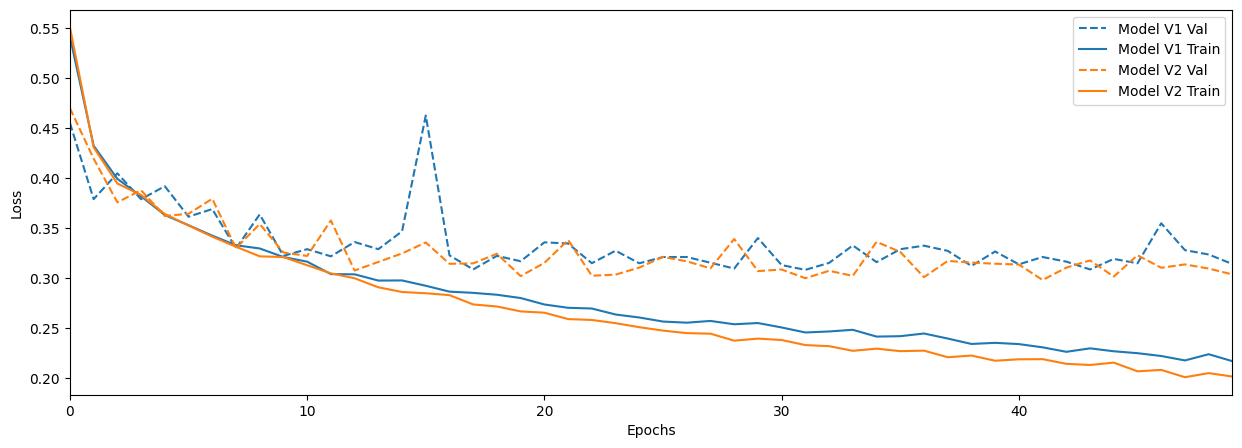

In [9]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(15, 5))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])

# Застосування функції
plot_history([('model v1', history_v1_improved), ('model v2', history_v2_improved)], key='accuracy')
plot_history([('model v1', history_v1_improved), ('model v2', history_v2_improved)], key='loss')